In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('mall_Customers.csv')
df.shape
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
if df is None:
	df = pd.read_csv('mall_Customers.csv')
df.drop(columns=['CustomerID', 'Gender'], inplace=True)   # for permananent delete we use inplace=True

In [19]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


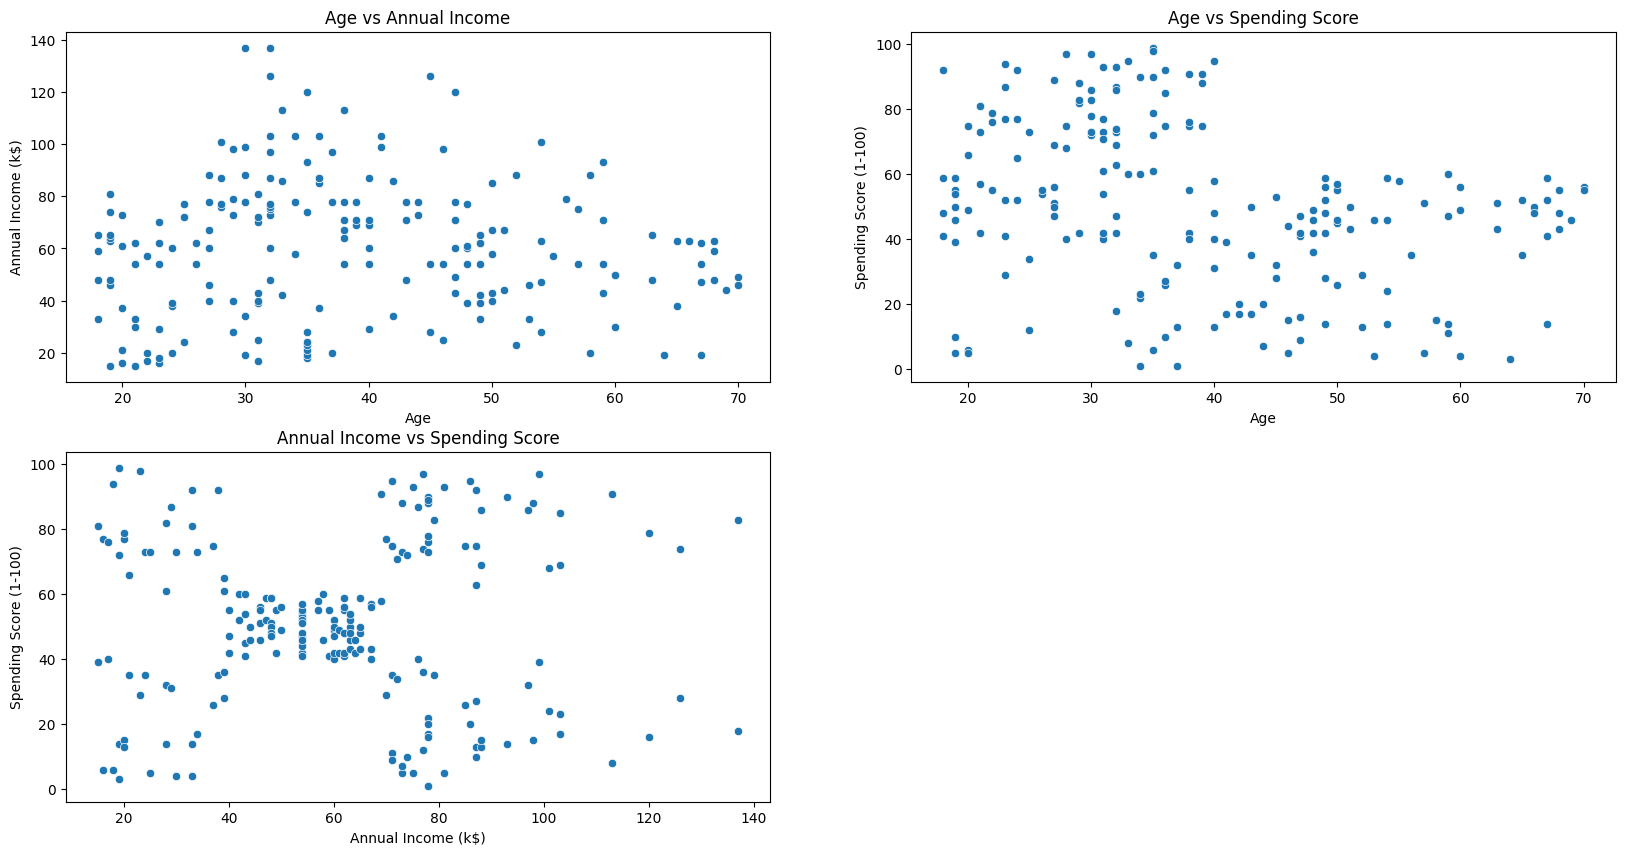

In [ ]:
#step 4 : EDA

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.subplot(2,2,2)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.subplot(2,2,3)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')    
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [35]:
# learn about skewness ,normal ad standard distribution
# based on that we use standard or normalizer 

In [31]:
# step 5 : Feature Engineering  

# display skewness normal,right or left
def skew_ness(n):
    if n >0 :
        return 'Right Skewed'
    elif n < 0:
        return 'Left Skewed'
    else:
        return 'Normal'
for col in df.columns:
    print(f'{col} : {skew_ness(df[col].skew())}')



Age : Right Skewed
Annual Income (k$) : Right Skewed
Spending Score (1-100) : Left Skewed


In [33]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [36]:
# step 6 : train k-mean model

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)

df['cluster'] = kmeans.labels_
df.head()


,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2


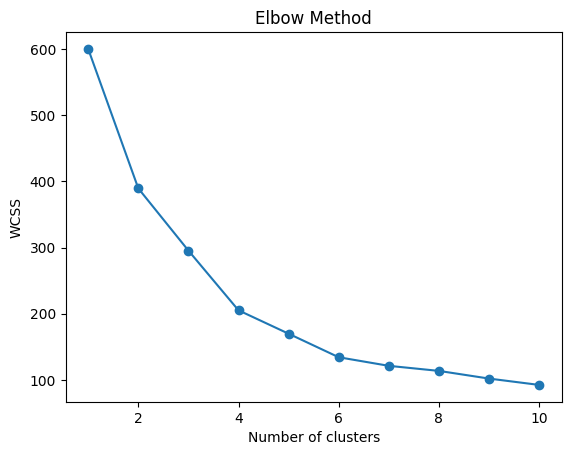

In [38]:
# check with elobow method to find optimal number of cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')   
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()   

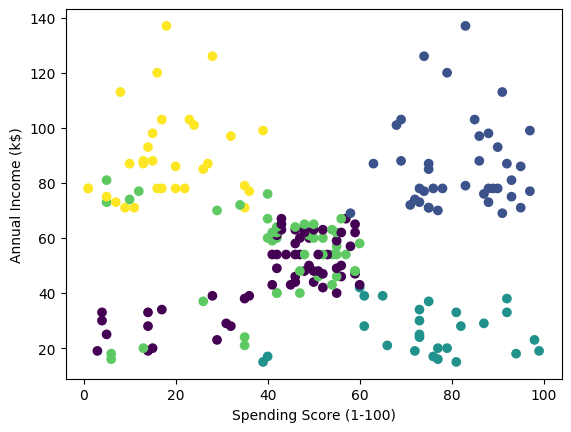

In [40]:
# display cluster centers
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'], c=df['cluster'])
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')
plt.show()

In [41]:
# save the file
df.to_csv('mall_customers_clustered.csv', index=False)

In [42]:
# load new dataset ,load model of classification ,train and test model 

df1=pd.read_csv('mall_customers_clustered.csv')
df1.head()


,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2


In [43]:
# import svc classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x=df1.drop(columns=['cluster'])
y=df1['cluster']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


print(accuracy_score(y_test,y_pred))

0.975


In [44]:
# save the model
import joblib
joblib.dump(model, 'kmeans_svc_model.pkl')

['kmeans_svc_model.pkl']